In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
filepath = 'https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/cantons/'

In [45]:
df_pop = pd.read_csv(filepath + 'population.csv')
df_climate = pd.read_csv(filepath + 'climate_df.csv', sep=';')
df_gdp = pd.read_csv(filepath + 'final_GDP.csv')
df_pm10 = pd.read_csv(filepath + 'PM10.csv')

In [46]:
display(df_pop.head(2))
display(df_climate.head(2)) 
display(df_gdp.head(2))
display(df_pm10.head(2))

,year,canton,pop,Name
0,1981,Zürich,1120815,ZH_Zuerich_urban
1,1981,Bern / Berne,897242,BE_Bern_urban


,year,temp,precip,Name
0,1874,3.79,810.0,VD_Lausanne_urban
1,1875,3.85,1073.1,VD_Lausanne_urban


,date,canton,GDP,Name
0,1998,BE,2.7448,BE_Bern_urban
1,1999,BE,1.5357,BE_Bern_urban


,Samplingpoint,year,Value,Canton,Name
0,CH0003R,2014,15.251558,TG,TG_Taenikon_rural
1,CH0003R,2016,12.342224,TG,TG_Taenikon_rural


In [47]:
df_pm10.rename(columns={'Value': 'pollution'}, inplace=True)
df_gdp.rename(columns={'date': 'year'}, inplace=True)
df_pop.drop(columns=['canton'], inplace=True)
df_gdp.drop(columns=['canton'], inplace=True)
df_pm10.drop(columns=['Samplingpoint', 'Canton'], inplace=True)

In [48]:
display(df_pop.head(2))
display(df_climate.head(2)) 
display(df_gdp.head(2))
display(df_pm10.head(2))

,year,pop,Name
0,1981,1120815,ZH_Zuerich_urban
1,1981,897242,BE_Bern_urban


,year,temp,precip,Name
0,1874,3.79,810.0,VD_Lausanne_urban
1,1875,3.85,1073.1,VD_Lausanne_urban


,year,GDP,Name
0,1998,2.7448,BE_Bern_urban
1,1999,1.5357,BE_Bern_urban


,year,pollution,Name
0,2014,15.251558,TG_Taenikon_rural
1,2016,12.342224,TG_Taenikon_rural


In [49]:
df_pop

,year,pop,Name
0,1981,1120815,ZH_Zuerich_urban
1,1981,897242,BE_Bern_urban
2,1981,294421,LU_Rigi_rural
3,1981,203598,BS_Basel_urban
4,1981,232625,BL_BaselBinningen_suburban
...,...,...,...
468,2023,354023,TI_Lugano_urban
469,2023,830431,VD_Lausanne_urban
470,2023,357282,VS_Saxon_rural
471,2023,176571,NE_Chaumont_rural


In [50]:
final_df = pd.merge(df_gdp,df_pop, on=['Name', 'year',], how='left')
final_df = pd.merge(final_df,df_pm10, on=['Name', 'year',], how='left')
final_df = pd.merge(final_df,df_climate, on=['Name', 'year',], how='left')
final_df.Name.unique()

array(['BE_Bern_urban', 'BL_BaselBinningen_suburban', 'BS_Basel_urban',
       'GE_Meyrin_suburban', 'LU_Rigi_rural', 'NE_Chaumont_rural',
       'TG_Taenikon_rural', 'TI_Lugano_urban', 'VD_Lausanne_urban',
       'VS_Saxon_rural', 'ZH_Zuerich_urban'], dtype=object)

In [51]:
final_df.sort_values(by=['year', 'Name'], inplace=True)

In [52]:
final_df

,year,GDP,Name,pop,pollution,temp,precip
0,1998,2.7448,BE_Bern_urban,938592.0,NaN,5.46,946.3
27,1998,3.9948,BL_BaselBinningen_suburban,255305.0,NaN,5.46,1517.3
54,1998,4.4960,BS_Basel_urban,193053.0,NaN,NaN,NaN
81,1998,3.1799,GE_Meyrin_suburban,396659.0,NaN,5.46,1247.6
108,1998,2.2782,LU_Rigi_rural,342916.0,NaN,5.46,1211.3
...,...,...,...,...,...,...,...
215,2024,0.9049,TI_Lugano_urban,NaN,13.974941,7.17,2527.3
242,2024,0.9575,VD_Lausanne_urban,NaN,12.587379,7.17,1206.2
269,2024,0.4114,VS_Saxon_rural,NaN,10.111029,7.17,934.8
304,2024,0.3067,ZH_Zuerich_urban,NaN,12.098689,7.17,1172.4


In [53]:
final_df.loc[final_df['Name'] == 'BS_Basel_urban', 'temp'] = final_df.loc[final_df['Name'] == 'BL_BaselBinningen_suburban', 'temp'].values
final_df.loc[final_df['Name'] == 'BS_Basel_urban', 'precip'] = final_df.loc[final_df['Name'] == 'BL_BaselBinningen_suburban', 'precip'].values

In [54]:
final_df[final_df['Name'].isin(['BS_Basel_urban', 'BL_BaselBinningen_suburban'])]

,year,GDP,Name,pop,pollution,temp,precip
27,1998,3.9948,BL_BaselBinningen_suburban,255305.0,NaN,5.46,1517.3
54,1998,4.4960,BS_Basel_urban,193053.0,NaN,5.46,1517.3
28,1999,2.5471,BL_BaselBinningen_suburban,256761.0,NaN,5.37,1723.6
55,1999,0.3308,BS_Basel_urban,190505.0,NaN,5.37,1723.6
29,2000,4.6271,BL_BaselBinningen_suburban,258602.0,NaN,5.99,1157.5
56,2000,4.1657,BS_Basel_urban,188458.0,NaN,5.99,1157.5
30,2001,3.8467,BL_BaselBinningen_suburban,259634.0,NaN,5.46,1568.0
57,2001,3.9435,BS_Basel_urban,187422.0,NaN,5.46,1568.0
31,2002,0.9017,BL_BaselBinningen_suburban,261083.0,NaN,6.08,1333.9
58,2002,3.3786,BS_Basel_urban,186469.0,NaN,6.08,1333.9


In [55]:
final_df

,year,GDP,Name,pop,pollution,temp,precip
0,1998,2.7448,BE_Bern_urban,938592.0,NaN,5.46,946.3
27,1998,3.9948,BL_BaselBinningen_suburban,255305.0,NaN,5.46,1517.3
54,1998,4.4960,BS_Basel_urban,193053.0,NaN,5.46,1517.3
81,1998,3.1799,GE_Meyrin_suburban,396659.0,NaN,5.46,1247.6
108,1998,2.2782,LU_Rigi_rural,342916.0,NaN,5.46,1211.3
...,...,...,...,...,...,...,...
215,2024,0.9049,TI_Lugano_urban,NaN,13.974941,7.17,2527.3
242,2024,0.9575,VD_Lausanne_urban,NaN,12.587379,7.17,1206.2
269,2024,0.4114,VS_Saxon_rural,NaN,10.111029,7.17,934.8
304,2024,0.3067,ZH_Zuerich_urban,NaN,12.098689,7.17,1172.4


In [56]:
final_df.to_csv(filepath + 'final_df.csv', index=False)

HTTPError: HTTP Error 404: Not Found

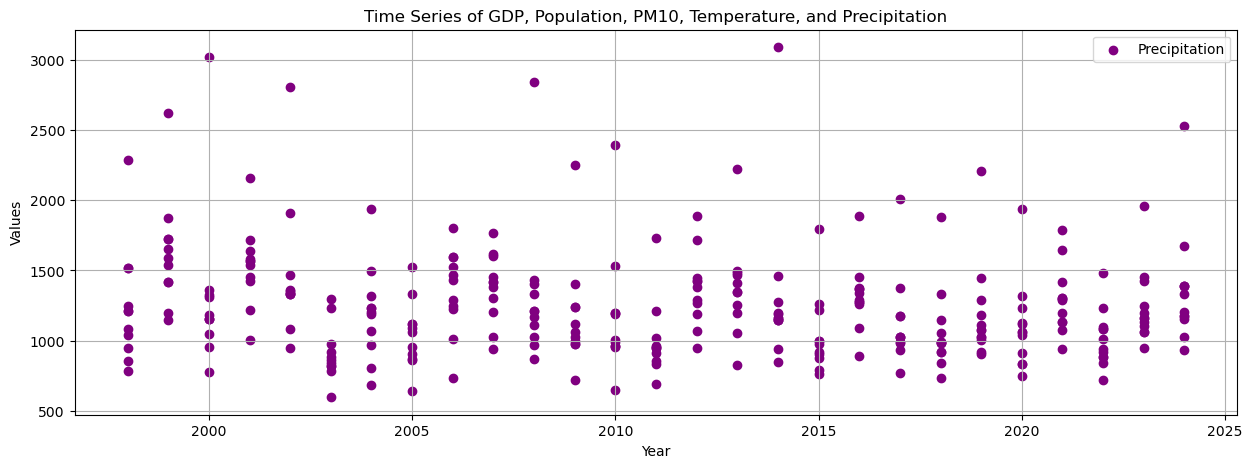

In [57]:
plt.figure(figsize=(15, 5))
#plt.scatter(final_df['year'], final_df['GDP'], label='GDP', color='blue')
#plt.scatter(final_df['year'], final_df['pop'], label='Population', color='orange')
#plt.scatter(final_df['year'], final_df['pollution'], label='PM10', color='green')
#plt.scatter(final_df['year'], final_df['temp'], label='Temperature', color='red')
plt.scatter(final_df['year'], final_df['precip'], label='Precipitation', color='purple')
plt.title('Time Series of GDP, Population, PM10, Temperature, and Precipitation')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()